In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integral
import numbers

def plot_pdf_1(pdf,w1,support=np.array([-1,1]),figsize=(8,8),**args):
    n1,n2=1,1
    u=np.linspace(-1,1)
    if not isinstance(w1,numbers.Number):
        n1=len(w1)
    fig,ax=plt.subplots(n1,n2,figsize=figsize)
    if n1 == 1:
        ax.plot(u,pdf(w1,u),**args)
    else: 
        for i in range(i):
            ax[i].plot(u,pdf(w1[i],u),**args)
    return ax

def plot_pdf_2(pdf,w1,w2,support=np.array([-1,1]),figsize=(8,8),**args):
    n1,n2=1,1
    u=np.linspace(*support)
    if not isinstance(w1,numbers.Number):
        n1=len(w1)
    if not isinstance(w2,numbers.Number):
        n2=len(w2)
    fig,ax=plt.subplots(n1,n2,figsize=figsize)
    if n1 == 1:
        ax.plot(u,pdf(w1,w2,u),**args)
    else:
        if n2 == 1:
            for i in range(n1):
                ax[i].plot(u,pdf(w1[i],w2,u),**args)
        else:
            for i in range(n1):
                for j in range(n2):
                    ax[i,j].plot(u,pdf(w1[i],w2[j],u),**args)
    print(n1,n2)
    return ax


# I. Continuous Probability Introduction
## 1. $\mathscr{L}^1\left(\mathbb{R}\right)$ space
This space is the vector space of Lebesgue Integrable functions with respect to the Lebesgue mesure with the norm $\lVert \cdot \rVert=\int_{\mathbb{R}}\lvert \cdot \rvert d\mu$
## 2. Probability Distribution Function
A probability distribution function is any non-negative Lebesgue Integrable function with unit norm.

In other words, $f$ is said to be a PDF if 
$$\begin{cases}
f\in \mathscr{L}^1\left(\mathbb{R},\mathbb{R}\right)\\
\int_{\mathbb{R}}\lvert f \rvert d\mu = 1 \\
\forall x \in \mathbb{R}, \quad f(x)\ge 0
\end{cases}$$

## 3. Random Variable
1. a random variable $X$ is any function from a probability triplet to a mesurable space
2. a continous random variable is a random variable with an uncountable image 
3. an absolutely continuous random variable ??

We will only consider absolutely continuous random variables, because they have a correspending PDF

## 4. Distribution Parameters
Let $X$ be a random variable with PDF $f$
1. The mean of $X$ is defined as:
$$\mathbb{E}\left[X\right]\triangleq \int_{\mathbb{R}}xf d\mu \quad \text{ if it exists and is finite}$$
2. The variance of $X$ is defined as:
$$\mathbb{V}\left[X\right]\triangleq \mathbb{E}\left[\left(X-\mathbb{E}\left[X\right]\right)^2\right] \quad \text{ if it exists and is finite}$$
3. The standard deviation of $X$ is defined as:
$$ \sigma_X\triangleq\sqrt{\mathbb{V}\left[X\right]} $$
4. For $k\in\mathbb{N},$ We define the moments $\mu_k$ as: 
$$ \mu_k\left(X\right)\triangleq\mathbb{E}\left[X^k\right] \quad \text{ if it exists and is finite}$$

# II. Common Distributions

## 1. Normal Distribution

### 1.1 Proving it is a distribution
Let $I=\int_{\mathbb{R}}e^{-x^2}dx$
We have $I >0$
$$
\begin{align}
X \sim \mathcal{N}\left(\mu,\sigma\right) \\
I^2 & = \left(\int_{\mathbb{R}}e^{-x^2}dx\right)\cdot\left(\int_{\mathbb{R}}e^{-y^2}dy\right) \\
&= \int_{\mathbb{R}}\int_{\mathbb{R}}e^{-\left(x^2+y^2\right)} dxdy \\
&= \iint_{\mathbb{R^2}}e^{-\lVert u \rVert^2} du \\
&= \iint_{\left[0,2\pi\right]\times \mathbb{R_+}}re^{-r^2} d\theta dr \\
&= \left(\int_0^{2\pi} d\theta\right) \cdot \left( \int_0^{+\infty} r e^{-r^2} dr \right) \\
&= 2\pi \Bigl[\frac{-1}{2}e^{r^2}\Bigr]_0^{+\infty} \\
&= \pi \\
\implies I &=\sqrt{\pi}  \\
\\
\frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx &=\frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}} \sqrt{2}\sigma  e^{-u^2} du & \begin{cases} u=\frac{x-\mu}{\sqrt{2}\sigma}\\ \sqrt{2}\sigma du=dx \end{cases} \\
&= \frac{1}{\sqrt{\pi}}\int_{\mathbb{R}} e^{-u^2} du \\
&= \frac{I}{\sqrt{\pi}} \\
&= 1
\end{align}$$

### 1.2 Expected Value

$$
\begin{align}
\mathbb{E}\left[X-\mu\right] &=\frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}(x-\mu)e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx\\
&= \frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}ue^{-\frac{u^2}{2\sigma^2}} du &\begin{cases} u=x-\mu \\ du=dx \end{cases} \\
&= 0 & \text{ because the integrand is odd} \\
\implies \mathbb{E}\left[X\right] &=\mu \\
\end{align}
$$

### 1.3 Variance

$$
\begin{align}
\mathbb{V}\left[X\right] &= \frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}(x-\mu)^2e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx\\
&= \frac{1}{\sqrt{2\pi}\sigma}\int_{\mathbb{R}}\sigma^2 u^2e^{-\frac{u^2}{2}} \sigma du & \begin{cases} u=\frac{x-\mu}{\sigma} \\ \sigma du=dx \end{cases} \\
&=  \frac{\sigma^2}{\sqrt{2\pi}}\int_{\mathbb{R}} u^2e^{-\frac{u^2}{2}} \sigma du \\
&= \frac{\sigma^2}{\sqrt{2\pi}}\left(\Bigl[-ue^{-u^2} \Bigr]_{-\infty}^{+\infty} + \int_{\mathbb{R}} e^{-\frac{u^2}{2}} \sigma du \right) \\
&= \frac{\sigma^2}{\sqrt{2\pi}}\int_{\mathbb{R}} e^{-\frac{u^2}{2}} \sigma du \\
&= \frac{\sigma^2}{\sqrt{\pi}}\int_{\mathbb{R}} e^{-v^2} \sigma dv & \begin{cases} v=\frac{u}{\sqrt{2}} \\ \sigma \sqrt{2}dv=du \end{cases} \\
&= \frac{\sigma^2}{\sqrt{\pi}} I \\
&= \sigma^2
\end{align} 
$$



Text(0.5, 1.0, 'Normal Distribution CDF for different parameters')

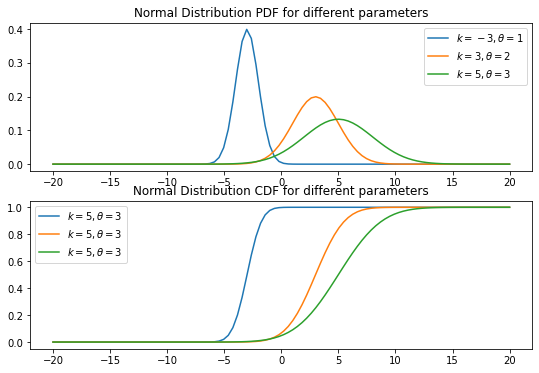

In [353]:
from scipy.special import erf
fig,ax=plt.subplots(2,figsize=(9,6))
x=np.linspace(-20,20,100)
mu_ran=[-3,3,5]
sigma_ran=[1,2,3]
for mu,sigma in zip(mu_ran,sigma_ran):
    ax[0].plot(x,np.exp(-((x-mu)**2)/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma),label=r"$k={},\theta={}$".format(mu,sigma))
ax[0].legend()
ax[0].set_title("Normal Distribution PDF for different parameters")

for mu,sigma in zip(mu_ran,sigma_ran):
    ax[1].plot(x,(1 + erf((x-mu)/np.sqrt(2*sigma**2)))/2,label=r"$k={},\theta={}$".format(k,theta))
ax[1].legend()
ax[1].set_title("Normal Distribution CDF for different parameters")

## 2. Uniform Distribution

### 2.1 Expected Value
$$ \mathbb{E}\left[X\right] = \frac{1}{b-a}\int_a^b xdx = \frac{b^2-a^2}{2(b-a)} = \frac{a+b}{2}  $$
### 2.2 Variance
$$
\mathbb{E}\left[X^2\right] = \frac{1}{b-a}\int_a^b x^2dx = \frac{b^3-a^3}{3(b-a)} = \frac{a^2+ab+b^2}{3} \\
\mathbb{V}\left[X\right] = \mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2 =  \frac{a^2+ab+b^2}{3}-\frac{a^2+2ab+b^2}{4}= \frac{a^2-2ab+b^2}{12}=\frac{(b-a)^2}{12}
$$

## 2.3 $a,b$ as functions of $\mu$ and $\sigma$
We have the following identities
$$
\begin{cases}
a &=\mu-\sqrt{3}\sigma \\
b &=\mu+\sqrt{3}\sigma
\end{cases}
$$

Text(0.5, 1.0, 'Uniform Distribution CDF for different parameters')

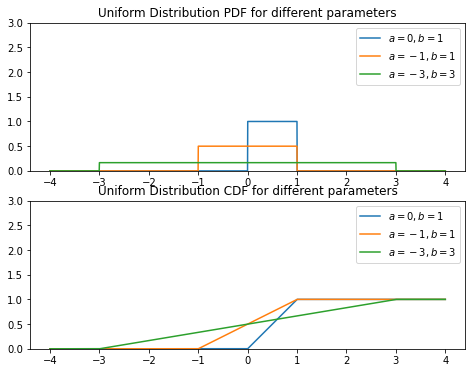

In [351]:
fig,ax=plt.subplots(2,figsize=(9,6))
x=np.linspace(-4,4,2000)
a_ran=[0,-1,-3]
b_ran=[1,1,3]
for a,b in zip(a_ran,b_ran):
    ax[0].plot(x,np.heaviside(x-a,0)*np.heaviside(b-x,0)/(b-a),label="$a={},b={}$".format(a,b))
ax[0].legend()
ax[0].set_aspect("equal",adjustable="box")
ax[0].set_ylim(0,3)
ax[0].set_title("Uniform Distribution PDF for different parameters")

for a,b in zip(a_ran,b_ran):
    ax[1].plot(x,np.minimum(1,np.heaviside(x-a,0)*(x-a)/(b-a)),label="$a={},b={}$".format(a,b))
ax[1].legend()
ax[1].set_aspect("equal",adjustable="box")
ax[1].set_ylim(0,3)
ax[1].set_title("Uniform Distribution CDF for different parameters")

## 3. Exponential Distribution

### 3.1 Expected Value
$$ \begin{align}
\mathbb{E}\left[X\right] &= \int_0^{+\infty}\lambda x e^{-\lambda x}dx \\
&= \frac{1}{\lambda}\int_0^{+\infty}ue^{-u}du & \begin{cases} u=\lambda x \\ \frac{du}{\lambda}=dx \end{cases}\\ 
&= \frac{\Gamma(2)}{\lambda} \\
&= \frac{1}{\lambda}
\end{align}
$$

### 3.2 Variance
$$ \begin{align}
\mathbb{E}\left[X^2\right] &= \int_0^{+\infty}\lambda x^2 e^{-\lambda x}dx \\
&= \frac{1}{\lambda^2}\int_0^{+\infty}u^2e^{-u}du & \begin{cases} u=\lambda x \\ \frac{du}{\lambda}=dx \end{cases}\\ 
&= \frac{\Gamma(3)}{\lambda^2} \\
&= \frac{2}{\lambda^2}
\mathbb{V}\left[X\right] &= \mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2 \\
&= \frac{1}{\lambda^2}
\end{align}
$$

## 3.3 $\lambda$ as a function of $\mu$
We have the following identity
$$\lambda=\frac{1}{\mu}
$$

## 3.4 Cumulative Distribution Function
$$ F(x)=1-e^{-\lambda x} $$

Text(0.5, 1.0, 'Exponential Distribution CDF for different parameters')

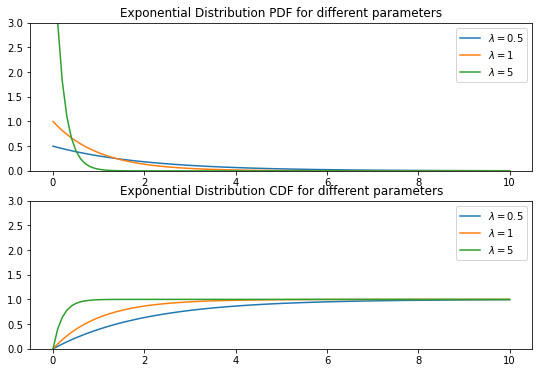

In [350]:
fig,ax=plt.subplots(2,figsize=(9,6))
x=np.linspace(0,10,100)
l_ran=[.5,1,5]
for l in l_ran:
    ax[0].plot(x,(l*np.exp(-l*x)),label=r"$\lambda ={} $".format(l))
ax[0].legend()
ax[0].set_ylim(0,3)
ax[0].set_title("Exponential Distribution PDF for different parameters")

for l in l_ran:
    ax[1].plot(x,1-np.exp(-l*x),label=r"$\lambda ={}$".format(l))
ax[1].legend()
ax[1].set_ylim(0,3)
ax[1].set_title("Exponential Distribution CDF for different parameters")

## 4. Gamma Distribution
### 4.1 Proving it is a Distribution
$$ \begin{align}
\frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}x^{k-1}e^{-\frac{x}{\theta}} dx 
&= \frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}\theta^{k-1}u^{k-1} e^{-u} \theta du & \begin{cases} u=\frac{x}{\theta} \\ \theta du =x \end{cases} \\
&= \frac{1}{\Gamma(k)} \int_{0}^{+\infty}u^{k-1} e^{-u} \\
&= \frac{1}{\Gamma(k)} \cdot \Gamma(k) \\
&= 1
\end{align}
$$

### 4.2 Expected Value
$$ \begin{align}
\mathbb{E}\left[X\right] &= 
\frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}x^{k}e^{-\frac{x}{\theta}} dx  \\
&= \frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}\theta^{k}u^{k} e^{-u} \theta du & \begin{cases} u=\frac{x}{\theta} \\ \theta du =x \end{cases} \\
&= \frac{\theta}{\Gamma(k)}\int_{0}^{+\infty}u^{k} e^{-u} \theta du \\
&= \frac{\theta}{\Gamma(k)}\cdot \Gamma(k+1) \\
&= k\theta
\end{align}
$$

### 4.3 Variance
$$ \begin{align}
\mathbb{E}\left[X^2\right] &= 
\frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}x^{k+1}e^{-\frac{x}{\theta}} dx  \\
&= \frac{1}{\theta^k \Gamma(k)}\int_{0}^{+\infty}\theta^{k+1}u^{k+1} e^{-u} \theta du & \begin{cases} u=\frac{x}{\theta} \\ \theta du =x \end{cases} \\
&= \frac{\theta^2}{\Gamma(k)}\int_{0}^{+\infty}u^{k+1} e^{-u} \theta du \\
&= \frac{\theta}{\Gamma(k)}\cdot \Gamma(k+2) \\
&= k(k+1)\theta \\
\mathbb{V}\left[X\right] &= \mathbb{E}\left[X^2\right]-\mathbb{E}\left[X\right]^2 \\
&= k(k+1)\theta^2-k^2\theta^2 \\
&= k\theta^2
\end{align}
$$

## 4.3 $k,\theta$ as functions of $\mu$ and $\sigma$
We have the following identities
$$
\begin{cases}
k &=\frac{\mu^2}{\sigma^2} \\
\theta &=\frac{\sigma^2}{\mu}
\end{cases}
$$

## 4.4 Cumulative Distribution Function
$$
F(x) = \frac{1}{\Gamma(k)} \gamma\left(k,\frac{x}{\theta}\right)
$$

Text(0.5, 1.0, 'Gamma Distribution CDF for different parameters')

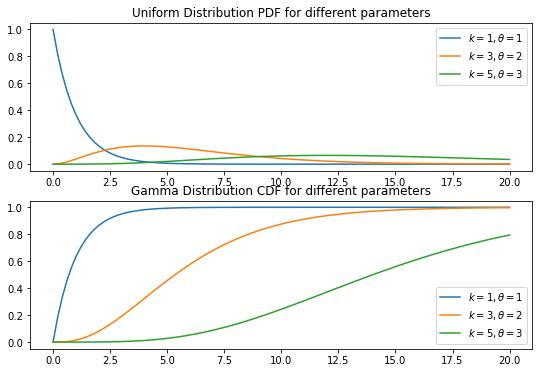

In [349]:
from scipy.special import gamma
from scipy.special import gammainc
fig,ax=plt.subplots(2,figsize=(9,6))
x=np.linspace(0,20,100)
k_ran=[1,3,5]
theta_ran=[1,2,3]
for k,theta in zip(k_ran,theta_ran):
    ax[0].plot(x,np.float_power(x,k-1)*np.exp(-x/theta)/(gamma(k)*np.float_power(theta,k)),label=r"$k={},\theta={}$".format(k,theta))
ax[0].legend()
ax[0].set_title("Uniform Distribution PDF for different parameters")

for k,theta in zip(k_ran,theta_ran):
    ax[1].plot(x,gammainc(k, x/theta) ,label=r"$k={},\theta={}$".format(k,theta))
ax[1].legend()
ax[1].set_title("Gamma Distribution CDF for different parameters")


## 5. Logistic Distribution
### 5.1 Proving it is a Distribution
$$ \begin{align}
\frac{1}{s}\int_{\mathbb{R}}\frac{e^{-\frac{x-\mu}{s}}}{\left(1+e^{-\frac{x-\mu}{s}}\right)^2}dx 
&= \frac{1}{s}\int_{\mathbb{R}}s \frac{e^{-u}}{\left(1+e^{-u}\right)^2}du & \begin{cases} u=\frac{x-\mu}{s}  \\ sdu =dx \end{cases} \\
&= \Bigl[\frac{1}{1+e^{-u}}\Bigr]_{-\infty}^{+\infty} \\
&= 1
\end{align}
$$

### 5.2 Expected Value
$$ \begin{align}
\mathbb{E}\left[X-\mu\right] &= \frac{1}{s}\int_{\mathbb{R}}\frac{(x-\mu)e^{-\frac{x-\mu}{s}}}{\left(1+e^{-\frac{x-\mu}{s}}\right)^2}dx \\
&= s \int_{\mathbb{R}}u\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du & \begin{cases} u=\frac{x-\mu}{s}  \\ sdu =dx \end{cases} \\
&= - s \int_{\mathbb{R}}v\frac{e^{v}}{\left(1+e^{v}\right)^2}dv & \begin{cases} v=-u  \\ -dv =du \end{cases} \\
&= - s \int_{\mathbb{R}}v\frac{e^{-v}}{e^{-2v}\left(1+e^{v}\right)^2}dv \\
&= - s \int_{\mathbb{R}}v\frac{e^{-v}}{\left(1+e^{-v}\right)^2}dv \\
&= -\mathbb{E}\left[X-\mu\right]\\
\implies \mathbb{E}\left[X-\mu\right] &= 0 \\
\implies \mathbb{E}\left[X\right] &= \mu
\end{align}
$$

### 5.3 Variance
$$ \begin{align}
\mathbb{V}\left[X\right] &= 
\frac{1}{s}\int_{\mathbb{R}}\frac{(x-\mu)^2e^{-\frac{x-\mu}{s}}}{\left(1+e^{-\frac{x-\mu}{s}}\right)^2}dx \\
&= s^2 \int_{\mathbb{R}}u^2\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du & \begin{cases} u=\frac{x-\mu}{s}  \\ sdu =dx \end{cases} \\
&= 2s^2 \int_{0}^{+\infty}u^2\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du
\end{align}
$$
Let $f_n=\sum{n\in\mathbb{N}} (-1)^nx^n,f = \frac{1}{x+1}$ 
We know that for $f_n$ converges point-wise to $f$ on $[0,1[$
$$ \begin{align}
\frac{1}{x+1} &= \sum_{n\in\mathbb{N}} (-1)^nx^n \\
\implies \frac{1}{(x+1)^2} &= -f'(x) \\
&= - \sum_{n\in\mathbb{N}^*} n(-1)^nx^{n-1}\\
&=  \sum_{n\in\mathbb{N}} (n+1)(-1)^nx^{n} & \forall x\in[0,1[ \\
\implies \frac{1}{(e^{-u}+1)^2} &= \sum_{n\in\mathbb{N}} (n+1)(-1)^ne^{-nu} & \forall u\in\mathbb{R}_+^* \\
\implies \frac{u^2e^{-u}}{(e^{-u}+1)^2} &= \sum_{n\in\mathbb{N}} (n+1)(-1)^nu^2e^{-(n+1)u} & \forall u\in\mathbb{R}_+^*
\end{align}
$$
- let $h_n=u\rightarrow\sum_{k=0}^n (k+1)(-1)^ku^2e^{-(k+1)u}, h=u\rightarrow \frac{u^2e^{-u}}{(e^{-u}+1)^2}$
- We admit that $\left(h_n\right)_{n\in\mathbb{N}}$ converges to $h$ in the norm of $\mathscr{L}^1$ (To Prove)
We have then: 
$$\begin{align}
\int_{\mathbb{R}_+}h du &= \sum_{n\in\mathbb{N}} \int_{\mathbb{R}_+} h_n du \\
\implies \int_{0}^{+\infty}u^2\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du &= \sum_{n\in\mathbb{N}} \int_{\mathbb{R}_+} (n+1)(-1)^nu^2e^{-(n+1)u} du \\
&= \sum_{n\in\mathbb{N}} (n+1) \int_{\mathbb{R}_+} \frac{(-1)^n}{(n+1)^3}v^2e^{-v} dv \begin{cases} v=(n+1)u \\ \frac{dv}{n+1}=du  \end{cases}\\
&= \sum_{n\in\mathbb{N}} \frac{(-1)^n}{(n+1)^2} \int_{\mathbb{R}_+} v^2e^{-v} dv \\
&= \sum_{n\in\mathbb{N}} \frac{(-1)^n}{(n+1)^2} \Gamma(3) \\
&= \sum_{n\in\mathbb{N}} 2\frac{(-1)^n}{(n+1)^2} \\
&= -2\sum_{n\in\mathbb{N}*} \frac{(-1)^n}{n^2} \\
&= -2\left(\frac{1}{4}\sum_{n\in\mathbb{N}*} \frac{1}{n^2}-\sum_{n\in\mathbb{N}} \frac{1}{(2n+1)^2}\right) \\
&= -2\left(\frac{1}{2}\sum_{n\in\mathbb{N}*} \frac{1}{n^2}-\frac{1}{4}\sum_{n\in\mathbb{N}*} \frac{1}{n^2}-\sum_{n\in\mathbb{N}} \frac{1}{(2n+1)^2}\right) \\
&= -2\left(\frac{1}{2}\sum_{n\in\mathbb{N}*} \frac{1}{n^2}-\sum_{n\in\mathbb{N}^*} \frac{1}{n^2}\right) \\
&=\sum_{n\in\mathbb{N}*} \frac{1}{n^2} \\
&= \frac{\pi^2}{6}
\end{align}
$$
- Conclusion
$$ \mathbb{V}\left[X\right]= 2s^2\int_{0}^{+\infty}u^2\frac{e^{-u}}{\left(1+e^{-u}\right)^2}du = \frac{\pi^2}{3}s^2 $$

## 5.4 $s$ as a functions of $\mu$ and $s$
We have the following identity:
$$
s = \frac{\sqrt{3}}{\pi}\sigma
$$

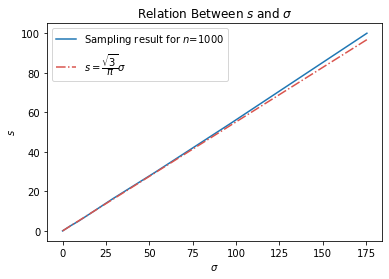

In [166]:
fig,ax = plt.subplots()
S = np.logspace(-3,2,20)
Sig=np.zeros(20)
n=1000
for i,s in enumerate(S):
    Sig[i]=np.random.logistic(0,s,n).std()
ax.plot(Sig,S,label="Sampling result for $n$={}".format(n))
ax.plot([0,Sig[-1]],[0,np.sqrt(3)*Sig[-1]/np.pi],color="xkcd:pale red",label=r"$s=\dfrac{\sqrt{3}}{\pi}\sigma$",ls="dashdot")
ax.set_title("Relation Between $s$ and $\sigma$")
ax.set_xlabel("$\sigma$")
ax.set_ylabel("$s$")
ax.legend()

# III. Distributions on other spaces

## 1 Multinormal Distribution

This distribution is a generalization of the normal distribution to an euclidean space $E$ of dimension $n\in\mathbb{N}^*$

### 1.1 Parameters
1. $\Sigma$ positive definite
2. $\mu \in E$

### 1.2 PDF
$$f(u) = \frac{1}{\sqrt{2\pi\cdot \lvert \det\Sigma \rvert}}e^{-\frac{1}{2}(u-\mu)^T\Sigma^{-1}(u-\mu)}$$

### 1.3 Proving it is a distribution

- We have $\Sigma$ is positive definite, so by the spectral theorem, $\Sigma$ is orthogonally diagonilisable with strictly positive eigenvalues.
- Let $U$ be an orthogonal matrix, $D$ a postive definite diagonal matrix such that $\Sigma=U^TDU$
$$
\begin{align}
   \int_{E}f(u) du 
   &= \frac{1}{\sqrt{\left(2\pi\right)^n\cdot \lvert \det\Sigma \rvert}} \int_{E} e^{-\frac{1}{2}(u-\mu)^T\Sigma^{-1}(u-\mu)}\\
   &= \frac{\sqrt{\lvert \det \Sigma \rvert}}{\sqrt{\left(2\pi\right)^n\cdot \lvert \det\Sigma \rvert}} \int_{E} e^{-\frac{1}{2}v^Tv} dv & 
       \begin{cases} 
           v=\sqrt{D^{-1}}\left(u-\mu\right)=\sqrt{D}^{-1}U\left(u-\mu\right) \\ 
           dv {= \lvert \det \dfrac{\partial v}{\partial u} \rvert du 
               =  \lvert \det \sqrt{D}^{-1}U \rvert du  \\
               = \sqrt{\lvert \det D\rvert}^{-1} \cdot \lvert \det U \rvert du
               = \sqrt{\lvert \det \Sigma \rvert}^{-1} du}
       \end{cases} \\
       &= \frac{1}{\sqrt{\left(2\pi\right)^n}} \int_{E} e^{-\frac{1}{2}v^Tv} dv \\
       &= \frac{1}{\sqrt{\left(2\pi\right)^n}} \int_{\mathbb{R}}\cdots\int_{\mathbb{R}} e^{-\frac{1}{2}\sum_{i=1}^n v_i^2} dv_1\cdots dv_n \\
       &= \frac{1}{\sqrt{\left(2\pi\right)^n}} \int_{\mathbb{R}}\cdots\int_{\mathbb{R}} \prod_{i=1}^n e^{-\frac{1}{2}v_i^2} dv_1\cdots dv_n \\
       &= \frac{1}{\sqrt{\left(2\pi\right)^n}} \int_{\mathbb{R}}e^{-v_1^2}dv_1\cdots\int_{\mathbb{R}}e^{-\frac{1}{2}v_n^2} dv_n \\
       &= \frac{1}{\sqrt{\left(2\pi\right)^n}} \prod_{i=1}^n \int_{\mathbb{R}}e^{-\frac{1}{2}v_i^2}dv_i \\
       &= \frac{1}{\sqrt{\left(2\pi\right)^n}} \left(\int_{\mathbb{R}}e^{-\frac{1}{2}x^2}dx\right)^n \\
       &= \frac{1}{\sqrt{\left(2\pi\right)^n}} \cdots \left(\sqrt{2\pi}\right)^n \\
       &= 1
\end{align}
$$

### 1.4 Mean
$$
\begin{align}
    \mathbb{E}\left[X-\mu\right] 
    &= \frac{1}{\sqrt{\left(2\pi\right)^n\cdot \lvert \det\Sigma \rvert}}  \int_{E}(u-\mu)f(u) du \\
 &= \frac{\sqrt{\lvert \det \Sigma \rvert}}{\sqrt{\left(2\pi\right)^n\cdot \lvert \det\Sigma \rvert}} \int_{E} U^T\sqrt{D}v e^{-\frac{1}{2}v^Tv} dv & 
       \begin{cases} 
           v=\sqrt{D}^{-1}U\left(u-\mu\right) \\ 
           dv = \sqrt{\lvert \det \Sigma \rvert} du
       \end{cases} \\
  &= \frac{1}{\sqrt{\left(2\pi\right)^n}} U^T\sqrt{D} \int_{E} v e^{-\frac{1}{2}v^Tv} dv \\
  \int_{E} v_i e^{-\frac{1}{2}v^Tv} dv &= \left(\prod_{j=1 \\ j\neq i}^n \left(\int_{E}  e^{-\frac{1}{2}x^2} dx\right) \right) \cdot \int_{E} x e^{-\frac{1}{2}x^2} dx \\
  &= 0 & \forall i \\
 \implies  \int_{E} v e^{-\frac{1}{2}v^Tv} dv  &= \boldsymbol{0} \\
 \implies \mathbb{E}\left[X\right] &= \mu
\end{align}
$$

### 1.5 Covariance Matrix

1. For $n=1$, we have $\Sigma=\sigma^2,$ so
$$
\mathbb{E}\left[\left(X-\mu\right)\left(X-\mu\right)\right]=\mathbb{E}\left[\left(X-\mu\right)^2\right] =\mathbb{V}\left[X\right] = \sigma^2=\Sigma
$$
2. The proof below is for valid for $n\ge 2$
$$
\begin{align}
    \mathbb{E}\left[\left(X-\mu\right)\left(X-\mu\right)^T\right] 
    &= \frac{1}{\sqrt{\left(2\pi\right)^n\cdot \lvert \det\Sigma \rvert}}  \int_{E}\left(x-\mu\right)\left(x-\mu\right)^Tf(u) du \\
 &= \frac{\sqrt{\lvert \det \Sigma \rvert}}{\sqrt{\left(2\pi\right)^n\cdot \lvert \det\Sigma \rvert}} \int_{E} U^T\sqrt{D}vv^T\sqrt{D}U e^{-\frac{1}{2}v^Tv} dv & 
       \begin{cases} 
           v=\sqrt{D}^{-1}U\left(u-\mu\right) \\ 
           dv = \sqrt{\lvert \det \Sigma \rvert}^{-1} du
       \end{cases} \\
  &= \frac{1}{\sqrt{\left(2\pi\right)^n}} U^T\sqrt{D} \left(\int_{E} vv^T e^{-\frac{1}{2}v^Tv} dv\right) \sqrt{D}U \\
\end{align}
$$
We now want to calculate $\int_{E} vv^T e^{-\frac{1}{2}v^Tv} dv$, we will do it component-wise
$$
\begin{align}
 \int_{E} v_iv_j e^{-\frac{1}{2}v^Tv} dv &= 
     \begin{cases} 
         \prod_{k=1 \\ k\notin\{i,j\}}^n \left(\int_{E}  e^{-\frac{1}{2}x^2} dx\right) \cdot \left(\int_{E} x e^{-\frac{1}{2}x^2} dx\right)^2 & i\neq j \\
         \prod_{k=1 \\ k\neq i}^n \left(\int_{E}  e^{-\frac{1}{2}x^2} dx\right) \cdot \left(\int_{E} x^2 e^{-\frac{1}{2}x^2} dx\right) & i = j
     \end{cases}\\
     &= \begin{cases} 
         \left(\int_{E}  e^{-\frac{1}{2}x^2} dx\right)^{n-2} \cdot \left(\int_{E} x e^{-\frac{1}{2}x^2} dx\right)^2 & i\neq j \\
         \left(\int_{E}  e^{-\frac{1}{2}x^2} dx\right)^{n-1} \cdot \left(\int_{E} x^2 e^{-\frac{1}{2}x^2} dx\right) & i = j
     \end{cases}\\
     &= \begin{cases} 
         \left(\sqrt{2\pi}\right)^{n-2}\cdot 0 & i\neq j \\
         \left(\sqrt{2\pi}\right)^{n-1} \cdot \sqrt{2\pi} & i = j
     \end{cases}\\
     &= \delta_{i,j}\left(\sqrt{2\pi}\right)^n & \forall i,j\in\{1,\dots,n\} \\
\implies \int_{E} vv^T e^{-\frac{1}{2}v^Tv} dv &= \left(\sqrt{2\pi}\right)^n I_n \\
 \implies \mathbb{E}\left[\left(X-\mu\right)\left(X-\mu\right)^T\right] &= \frac{\left(\sqrt{2\pi}\right)^n}{\left(\sqrt{2\pi}\right)^n}U^T\sqrt{D}I_n\sqrt{D}U \\
 &= U^T\sqrt{D}\sqrt{D}U \\
 &= U^TDU \\
 &= \Sigma
\end{align}
$$
### 1.6 Plot of PDF for $n=2$

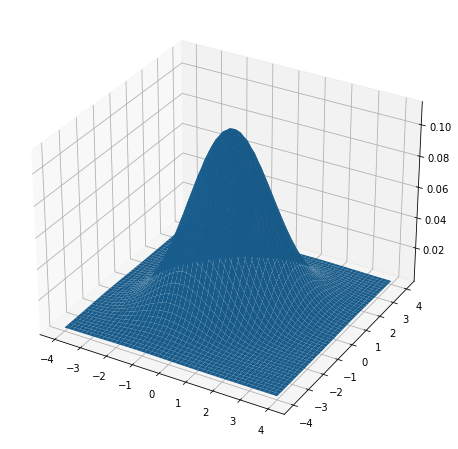

In [67]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
mu=np.array([0,0])
P=np.array([[np.sqrt(2),np.sqrt(2)],[np.sqrt(2),-np.sqrt(2)]])/2
cov=P.T@np.array([[2,0],[0,1]])@P
eig,_=np.linalg.eig(cov)
largest_eig=np.max(eig)
k=2
m=50
X,Y=np.meshgrid(np.linspace(mu[0]-k*largest_eig,mu[0]+k*largest_eig,m),
                np.linspace(mu[1]-k*largest_eig,mu[1]+k*largest_eig,m))
U=np.array([X.flatten(),Y.flatten()])
det_cov=np.linalg.det(cov)
cov_inv=np.linalg.inv(cov)
S=np.apply_along_axis(lambda u:(u-mu).T@cov_inv@(u-mu),arr=U,axis=0)
S=S.reshape(X.shape)
ax.plot_surface(X,Y,np.exp(-.5*S)/(2*np.pi*np.sqrt(np.abs(det_cov))),antialiased=True)

### 1.7 Sample of 2D Multinormal Distribution

Text(0.5, 1.0, 'Sample from multinormal distribution')

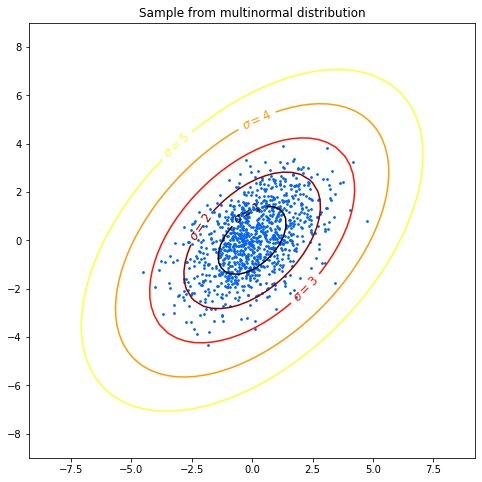

In [347]:
n=1000
mu=np.array([0,0])
cov=np.array([[2,1],[1,2]])
U=np.random.multivariate_normal(mu,cov,n)
fig,ax=plt.subplots(figsize=(8,8))
eig,_=np.linalg.eig(cov)
largest_eig=np.max(eig)

k=3
m=50
X,Y=np.meshgrid(np.linspace(mu[0]-k*largest_eig,mu[0]+k*largest_eig,m),
                np.linspace(mu[1]-k*largest_eig,mu[1]+k*largest_eig,m))
cov_pinv=np.linalg.pinv(cov)
S=np.array([X.flatten(),Y.flatten()])
Z=np.sqrt(np.apply_along_axis(lambda u:(u-mu).T@cov_pinv@(u-mu),arr=S,axis=0).reshape(X.shape))

ax.scatter(U[:,0],U[:,1],color="xkcd:bright blue",s=3)
cs=ax.contour(X,Y,Z,levels=[1,2,3,4,5,6],cmap="hot")
ran=np.arange(1,6)
fmt = dict(zip(ran,[r"$\sigma= {}$".format(i) for i in ran]))
ax.clabel(cs,fmt=fmt,fontsize="large")
ax.set_aspect("equal","datalim")
ax.set_title("Sample from multinormal distribution")

### 1.8 point on 3D Multinormal distribution

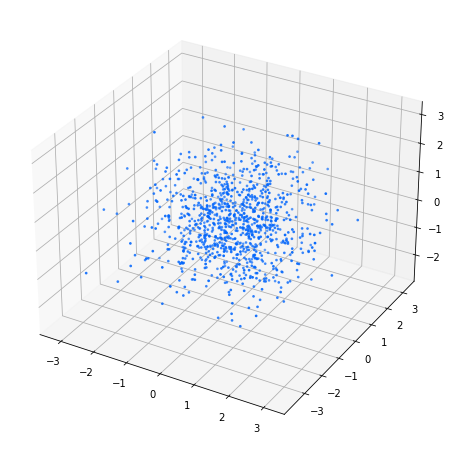

In [66]:
n=1000
mu=np.array([0,0,0])
cov=np.array([[1,0,0],[0,1,0],[0,0,1]])
U=np.random.multivariate_normal(mu,cov,n)
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection="3d")
eig,_=np.linalg.eig(cov)
largest_eig=np.max(eig)
k=3
m=50

ax.scatter(U[:,0],U[:,1],U[:,2],color="xkcd:bright blue",s=3)

## 2. Uniform distribution on a mesurable set $S$
Let $\mu$ be a mesure and $S$ be a mesurable set with finite mesure $V$
$$
P\left(X \in A\right)= \frac{1}{V} \int_{A}d\mu
$$
Let $X \sim \mathcal{U}\left(S\right)$

### 2.1. $S=[0,1]^n$
1. we can show that each $\forall i\neq j$, $X_i$ and $X_j$ are independant
2. Furthermore, $\forall i\in\left\{1,\dots,n\right\}, X_i\sim \mathcal{U}\left(0,1\right)$
3. By a change of variables, every uniform distribution on a Parallelotope can be transformed to the unit hypercube

### 2.2 Uniform distribution on $\mathcal{B_2}(0,1)$
1. Let $R,\Theta$  be a random vector for independant variables $X=\left(R\cos\Theta,R\sin\Theta\right)$
2. $f_X=\frac{1}{V}:$

$$
\begin{align}
F_X(x) &= \int{0}^{x}
\end{align}
$$

0.308


Text(0.5, 1.0, 'Uniformly Distributed points on the unit Square Region')

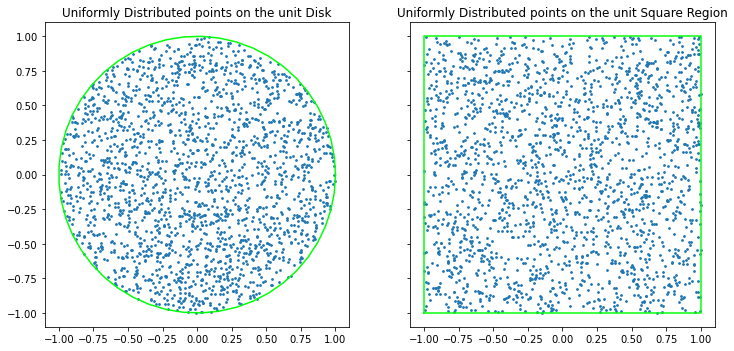

In [154]:
fig,ax = plt.subplots(1,2,sharex=True,sharey=True,figsize=(12,12))
R=1
n=2000
r,theta=np.float_power(np.random.uniform(0,R**2,n),.5),np.random.uniform(0,2*np.pi,n)
X,Y=r*np.cos(theta),r*np.sin(theta)
ax[0].scatter(X,Y,s=3)
phi=np.linspace(0,2*np.pi)

ax[0].plot(R*np.cos(phi),R*np.sin(phi),color="xkcd:bright green")
ax[0].set_aspect("equal")
print((np.maximum(np.abs(X),np.abs(Y))<.5).mean())
ax[0].set_title("Uniformly Distributed points on the unit Disk")


ax[1].scatter(np.random.uniform(-R,R,n),np.random.uniform(-R,R,n),s=3)
ax[1].set_aspect("equal")
ax[1].plot([-R,R,R,-R,-R],[-R,-R,R,R,-R],color="xkcd:bright green")
ax[1].set_title("Uniformly Distributed points on the unit Square Region")

### 2.3 Uniform Distribution on a $\mathcal{S_2}(0,R)$
#### 2.3.1 Method 1

Text(0.5, 0.92, 'Uniformly Distributed point on $\\mathcal{S}(0,1)$')

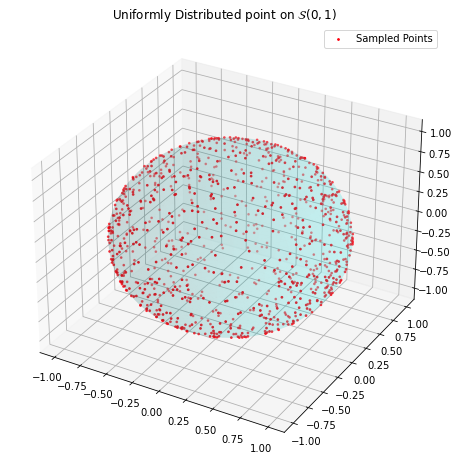

In [59]:
n=1000
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection="3d")
A1=np.random.uniform(0,2*np.pi,n)
A2=2*np.arcsin(np.sqrt(np.random.uniform(0,1,n)))
theta,phi=np.meshgrid(np.linspace(0,2*np.pi),np.linspace(0,np.pi))
ax.plot_surface(np.cos(theta)*np.sin(phi),np.sin(phi)*np.sin(theta),np.cos(phi),alpha=.1,color="xkcd:cyan")
ax.scatter(np.cos(A1)*np.sin(A2),np.sin(A1)*np.sin(A2),np.cos(A2),label="Sampled Points",color="xkcd:bright red",s=3)
ax.legend()
ax.set_title(r"Uniformly Distributed point on $\mathcal{{S}}(0,{})$".format(R))

#### 2.3.2 Method 2

(1000, 3)


Text(0.5, 0.92, 'Uniformly Distributed point on $\\mathcal{S}(0,1)$')

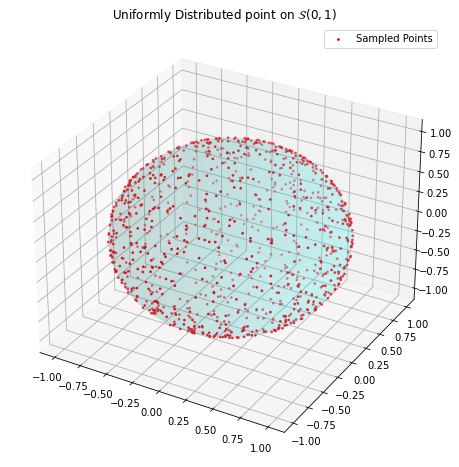

In [12]:
n=1000
R=1
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection="3d")
U=np.random.multivariate_normal(np.zeros(3),np.eye(3),n)
U=(U.T/np.linalg.norm(U,axis=1)).T
theta,phi=np.meshgrid(np.linspace(0,2*np.pi),np.linspace(0,np.pi))
ax.plot_surface(np.cos(theta)*np.sin(phi),np.sin(phi)*np.sin(theta),np.cos(phi),alpha=.1,color="xkcd:cyan")
ax.scatter(U[:,0],U[:,1],U[:,2],label="Sampled Points",color="xkcd:bright red",s=3)
ax.legend()
ax.set_title(r"Uniformly Distributed point on $\mathcal{{S}}(0,{})$".format(R))

### 2.4 Uniform Distribution on $\mathcal{B_3}(0,R)$

#### 2.4.1 Method 1

Text(0.5, 0.92, 'Uniformly Distributed point on $\\mathcal{B}(0,1)$')

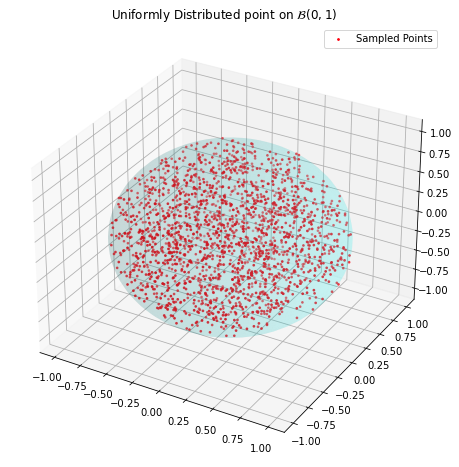

In [60]:
n=2000
R=1
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection="3d")
A1=np.random.uniform(0,2*np.pi,n)
A2=2*np.arcsin(np.sqrt(np.random.uniform(0,1,n)))
r=np.float_power(np.random.uniform(0,R,n),1/3)
theta,phi=np.meshgrid(np.linspace(0,2*np.pi),np.linspace(0,np.pi))
X,Y,Z=r*np.cos(A1)*np.sin(A2),r*np.sin(A1)*np.sin(A2),r*np.cos(A2)
L=np.array([X,Y,Z])
ax.plot_surface(R*np.cos(theta)*np.sin(phi),R*np.sin(phi)*np.sin(theta),R*np.cos(phi),alpha=.1,color="xkcd:cyan")
ax.scatter(X,Y,Z,label="Sampled Points",color="xkcd:bright red",s=3)
ax.legend()
ax.set_title(r"Uniformly Distributed point on $\mathcal{{B}}(0,{})$".format(R))

#### 2.4.2 Method 2

Text(0.5, 0.92, 'Uniformly Distributed point on $\\mathcal{B}(0,1)$')

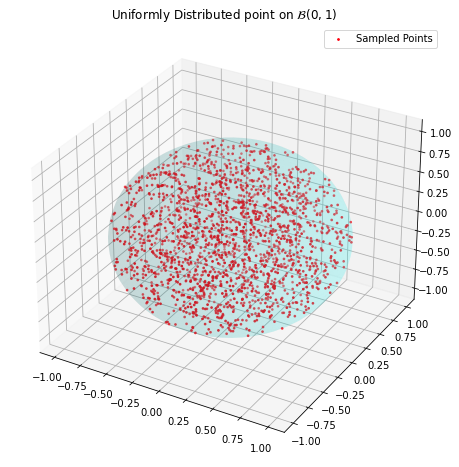

In [17]:
n=2000
R=1
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection="3d")
U=np.random.multivariate_normal(np.zeros(3),np.eye(3),n)
U=(U.T/np.linalg.norm(U,axis=1)).T
r=np.float_power(np.random.uniform(0,R,n),1/3)
theta,phi=np.meshgrid(np.linspace(0,2*np.pi),np.linspace(0,np.pi))
ax.plot_surface(np.cos(theta)*np.sin(phi),np.sin(phi)*np.sin(theta),np.cos(phi),alpha=.1,color="xkcd:cyan")
ax.scatter(r*U[:,0],r*U[:,1],r*U[:,2],label="Sampled Points",color="xkcd:bright red",s=3)
ax.legend()
ax.set_title(r"Uniformly Distributed point on $\mathcal{{B}}(0,{})$".format(R))

#### 2.4.3 Method 3

Text(0.5, 0.92, 'Uniformly Distributed point on $\\mathcal{B}(0,1)$')

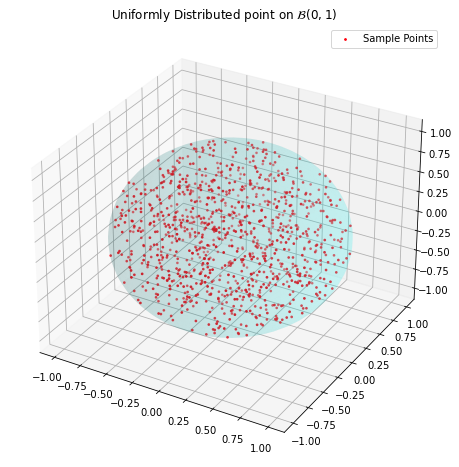

In [61]:
n=2000
R=1
ax=plt.subplot(111,projection="3d")
plt.gcf().set_size_inches(18.5, 10.5)
theta,phi=np.meshgrid(np.linspace(0,2*np.pi),np.linspace(0,np.pi))
X,Y,Z=np.random.uniform(-R,R,n),np.random.uniform(-R,R,n),np.random.uniform(-R,R,n)
S=(X**2+Y**2+Z**2) < R**2
X=X[S]
Y=Y[S]
Z=Z[S]
L=np.array([X,Y,Z])
ax.plot_surface(R*np.cos(theta)*np.sin(phi),R*np.sin(phi)*np.sin(theta),R*np.cos(phi),alpha=.1,color="xkcd:cyan")
ax.scatter(X,Y,Z,label="Sample Points",color="xkcd:bright red",s=3)
ax.legend()
ax.set_title(r"Uniformly Distributed point on $\mathcal{{B}}(0,{})$".format(R))

## 3. Vonmises Distribution

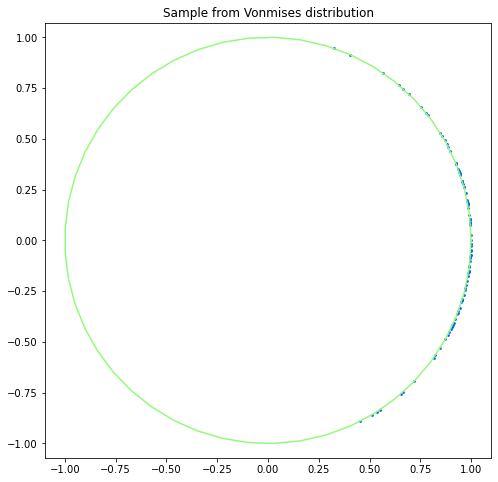

In [68]:
n=100
mu=0
k=5
U=np.random.vonmises(mu,k,n)
fig,ax=plt.subplots(figsize=(8,8))

t=np.linspace(0,2*np.pi)
ax.scatter(np.cos(U),np.sin(U),color="xkcd:bright blue",s=3)
ax.set_aspect("equal","datalim")
ax.set_title("Sample from Vonmises distribution")
ax.plot(np.cos(t),np.sin(t),color="xkcd:light green")